# Un progetto dall'inizio alla fine: lavoriamo con dati reali

Siete stati assunti come Data Specialist da una azienda che svolge analisi statistiche del mercato immobiliare americano. Ecco gli step che realizzeremo in questo progetto: Il vostro compito e' predirre il prezzo di una casa in california dato il numero di stanze e la posizione e altre caratteristiche. <br>

La checklist semplificata del progetto sara':

- [] Guardiamo al quadro generale (Big Picture)
- [] Procuriamoci i dati
- [] Analizziamo e visualizziamo i dati per acquisirne consapevolezza
- [] Prepara i dati per l'algoritmo di Machine Learning
- [] Seleziona il modello e addesteralo
- [] Ottimizza il modello con una messa a punto 
- [] Presenta la soluzione
- [] Lancia, Monitora e Mantieni il tuo modello

## 1 - The Big Picture, inquadriamo il problema
### 1.1 - La fonte dei dati:
- Repository popolari:
    - [Irvine](https://archive.ics.uci.edu)
    - [Kaggle](https://www.kaggle.com)
    - [Amazone AWS](https://registry.opendata.aws)
- Meta Portali:
    - [Data Portals](https://dataportals.org)
    - [Open Data Watch](https://opendatawatch.com/monitoring/)
    - [Quandl](https://data.nasdaq.com/publishers/QDL)
- Raccolte di link a repo:
    - [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
    - [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
    - [Reddit](https://www.reddit.com/r/datasets/) 

### 1.2 - Procuriamoci i dati:
Per il download dei dati da web e' sempre conveniente scrivere una funzione che possa essere richiamata in automatcoa seconda delle esigenze.


In [12]:
# Download dei dati
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    """
    Carica il dataset degli alloggi.

    Output:
    DataFrame: Un DataFrame di pandas contenente i dati degli alloggi.

    Descrizione:
    Questa funzione verifica se il file 'housing.tgz' esiste nel percorso specificato. 
    Se il file non esiste, lo scarica da un URL fornito, lo estrae e legge il file CSV 
    'housing.csv' da una directory specificata, restituendo infine i dati in un DataFrame di pandas.
    """

    # Percorso del file tarball
    tarball_path = Path("datasets/housing.tgz")

    # Se il file non esiste, scarica ed estrai i dati
    if not tarball_path.is_file():
        # Crea la directory se non esiste
        Path("datasets").mkdir(parents=True, exist_ok=True)
        
        # URL da cui scaricare i dati
        url = "https://github.com/ageron/data/raw/main/housing.tgz"

        # Scarica il file tarball
        urllib.request.urlretrieve(url, tarball_path)

        # Estrae il file tarball
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    
    # Legge il file CSV e lo restituisce come un DataFrame
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [13]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### Analisi e valutazione dei dati
Significato di ciascuna colonna
-   **longitude:** longitudine della posizione dell'alloggio
-   **latitude:** latitudine della posizione dell'alloggio
-   **housing_median_age:** età media degli alloggi nella zona
-   **total_rooms:** numero totale delle stanze nel quartiere
-   **total_bedrooms:** numero totale delle camere da letto nel quartiere
-   **population:** popolazione totale nella zona
-   **households:** numero totale di famiglie nella zona
-   **median_income:** reddito medio delle famiglie nella zona
-   **median_house_value:** valore medio delle case nella zona
-   **ocean_proximity:** prossimità all'oceano

In [19]:
print(f'Il Dataset ha {housing.shape[0]} istanze e {housing.shape[1]} attributi.')

Il Dataset ha 20640 istanze e 10 attributi.


In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


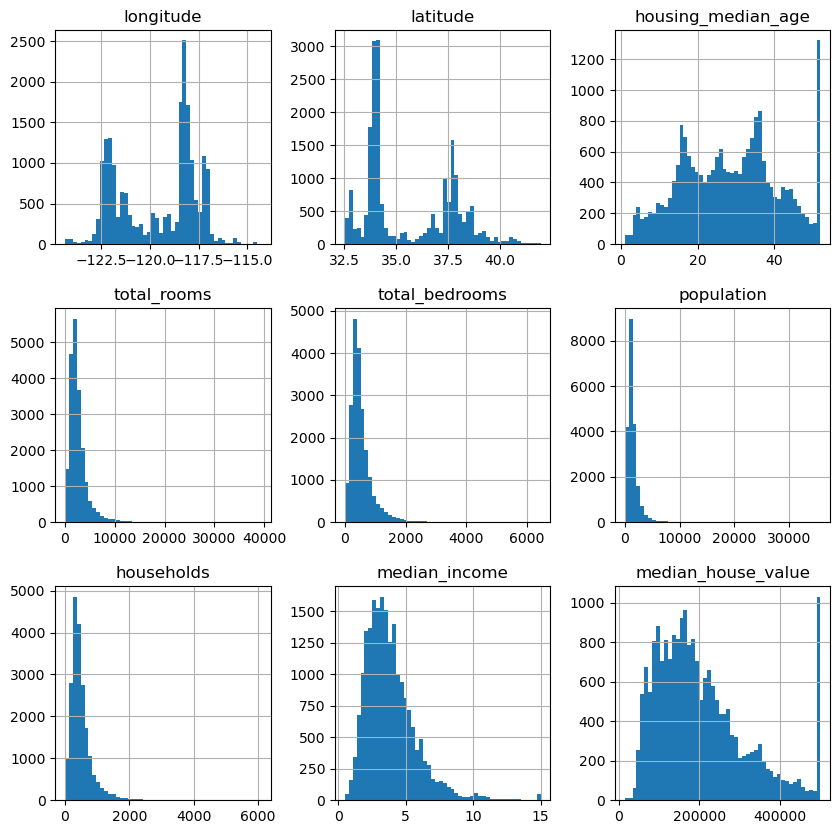

In [87]:
housing.hist(bins=50,figsize=(10,10));

In [93]:
#Attenzione alle grandezze 'capped'
# Meglio normalizzare i dati, le campane simmetriche funzionano meglio

In [49]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [94]:
# total_bedrooms contiene valori di tipo NAN NotANumber o 'None', questo attributo dovrà essere gestito 
housing.total_bedrooms


0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

### Creazione di un TestSet
Prima guardare oltre nei dati e' molto importante separare una certa qauntita' di dati e metterla da parte senza toccarla. <br>
Sarebbe importante che il test set sia mediamente rappresentativo di ciascun attributo. Se il dataset non e' molto grande potrebbe essere necessario crare un test set stratifiato.  

### Exploring Data

### Correlations